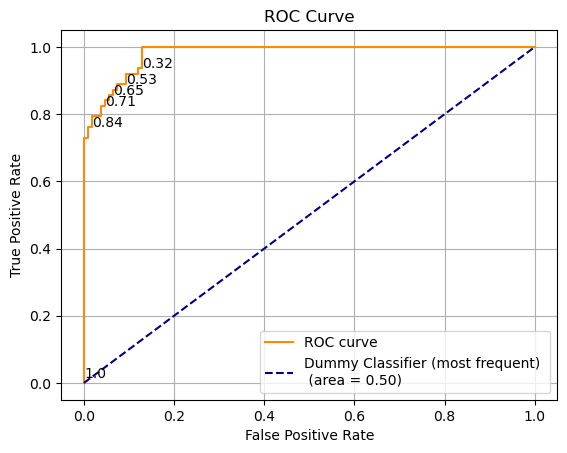

ROC AUC score: 0.9810405643738976


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('breast_cancer_data.csv')
#encode malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
predictor_var = ['radius_mean', 'texture_mean', 
                  'compactness_mean',
                 'symmetry_mean',]
outcome_var='diagnosis'
x_train, x_test, y_train, y_test = train_test_split(df[predictor_var], df[outcome_var], random_state=0, test_size=0.3)

log_reg = LogisticRegression(penalty=None, fit_intercept=True,tol=0.0000001,solver='newton-cg')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
y_pred_prob = log_reg.predict_proba(x_test)
###################################################################
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
idx = list(range(len(thresholds)))[1::4]
for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(2))

clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(x_train, y_train)
roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1] )
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, color='navy',linestyle='--', label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()

# Print AUC score

roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print(f'ROC AUC score: {roc_auc}')



